In [41]:
import networkx as nx
import pandas as pd
import os
from os import path as osp
from utils import Indexer
from matplotlib import pyplot as plt
from collections import Counter

In [2]:
raw_dir = "F:\\Python-projects\\paper-2022-1\\data\\weibo_repost_01\\微博传播规模预测"
os.listdir(raw_dir)


['test.origin_weibo.csv',
 'test.repost.csv',
 'train.origin_weibo.csv',
 'train.repost.csv',
 'user_profile.csv',
 '~$传播规模预测数据集说明.docx',
 '微博传播规模预测数据集说明.docx']

In [3]:
train_repost_path = osp.join(raw_dir, "train.repost.csv")
train_origin_path = osp.join(raw_dir, "train.origin.csv")
user_profile_path = osp.join(raw_dir, "user_profile.csv")
print(train_repost_path, train_origin_path, user_profile_path, sep='\n')

F:\Python-projects\paper-2022-1\data\weibo_repost_01\微博传播规模预测\train.repost.csv
F:\Python-projects\paper-2022-1\data\weibo_repost_01\微博传播规模预测\train.origin.csv
F:\Python-projects\paper-2022-1\data\weibo_repost_01\微博传播规模预测\user_profile.csv


In [4]:
with open(train_repost_path, 'r', encoding='utf8') as f:
    for i in range(3):
        line = f.readline()
        print(line)

OriginWeiboId	OriginUserId	CurrentWeiboId	CurrentUserId	RepostWeiboId	RepostUserId	RepostDate	RepostWeiboText

763ce4f8e9efcdee22c2d6ce213e63b1f537a4f3	65ba57e1fd5daa6042ca6c12f3cc9c1b031aacbe	763ce4f8e9efcdee22c2d6ce213e63b1f537a4f3	65ba57e1fd5daa6042ca6c12f3cc9c1b031aacbe	1f451892057c4a55a7ca2fd331a0b9195f8e7b10	4412ee9535a8a53ad9266c76b9670eb8c71d1e4b	2021-08-06 22:06:35	转发微博

763ce4f8e9efcdee22c2d6ce213e63b1f537a4f3	65ba57e1fd5daa6042ca6c12f3cc9c1b031aacbe	763ce4f8e9efcdee22c2d6ce213e63b1f537a4f3	65ba57e1fd5daa6042ca6c12f3cc9c1b031aacbe	80dce43c9168a58027a93d2862c4732eabeb7adf	dab012627fe5bd665414a4fb6776d5f28c233e7e	2021-08-06 21:02:18	@快乐super //@满屋子蛐蛐叫:我姐就注射的摩德纳，在抗体还非常强的情况下，感染上了新冠，发烧了好几天，现在退烧了，失去味觉。



In [5]:
df = pd.read_csv(train_repost_path, sep='\t', encoding='utf8')
len(df)

1061161

In [34]:
weibo_indexer = Indexer()
user_indexer = Indexer()
# df['OriginWeiboId'].map(weibo_indexer)
# df['CurrentWeiboId'].map(weibo_indexer)
df['RepostWeiboId'] = df['RepostWeiboId'].map(weibo_indexer)
df['CurrentWeiboId'] = df['CurrentWeiboId'].map(weibo_indexer)
df['OriginWeiboId'] = df['OriginWeiboId'].map(weibo_indexer)

df['OriginUserId'] = df['OriginUserId'].map(user_indexer)
df['CurrentUserId'] = df['CurrentUserId'].map(user_indexer)
df['RepostUserId'] = df['RepostUserId'].map(user_indexer)

In [35]:
df.loc[df['OriginWeiboId'] != df['RepostWeiboId']]



,OriginWeiboId,OriginUserId,CurrentWeiboId,CurrentUserId,RepostWeiboId,RepostUserId,RepostDate,RepostWeiboText
0,1061161,0,1061161,0,0,90,2021-08-06 22:06:35,转发微博
1,1061161,0,1061161,0,1,91,2021-08-06 21:02:18,@快乐super //@满屋子蛐蛐叫:我姐就注射的摩德纳，在抗体还非常强的情况下，感染上了新...
2,1061161,0,1061161,0,2,92,2021-08-06 13:43:02,转发微博
3,1061161,0,1061161,0,3,93,2021-08-06 11:54:26,Repost
4,1061161,0,1061161,0,4,94,2021-08-06 11:38:27,转发微博
...,...,...,...,...,...,...,...,...
1061156,1079160,25,1079160,25,1061156,163578,2020-08-08 20:04:24,转发微博
1061157,1079160,25,1079160,25,1061157,6697,2020-08-08 20:03:32,Repost
1061158,1079160,25,1079160,25,1061158,3566,2020-08-08 20:02:12,转发微博
1061159,1079160,25,1079160,25,1061159,308522,2020-08-08 20:01:44,转发微博


In [36]:
g = nx.from_pandas_edgelist(df, 'RepostWeiboId', 'CurrentWeiboId', create_using=nx.MultiDiGraph)
g

In [37]:
components = list(nx.connected_components(g.to_undirected()))
len(components)

18000

In [38]:
for sub_nodes in components:
    # if len(sub_nodes) < 50 or len(sub_nodes)>100:
    #     continue
    subg = nx.subgraph(g, sub_nodes)
    max_degree_node, max_degree = max(nx.degree(subg), key=lambda x:x[1])

    if max_degree == len(sub_nodes) - 1:
        continue
    print(max_degree_node, max_degree)
    nx.draw(subg, node_size=10)
    plt.show()
    break

In [40]:
len(max(components, key=len))

38856

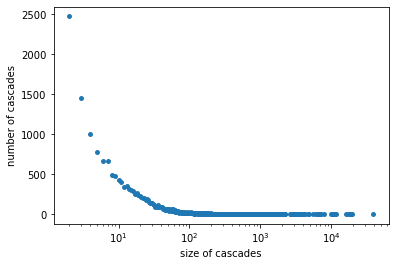

In [48]:
sizes = list(map(lambda x: len(x), components))
counter = Counter(sizes)
plt.ylabel('number of cascades')
plt.xlabel('size of cascades')
plt.xscale('log')
plt.scatter(counter.keys(), counter.values(), s=15)
plt.savefig(osp.join(raw_dir,'data-distribution.png'))
plt.show()

In [53]:
df.groupby('OriginWeiboId').groups.items()

dict_items([(1061161, Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37],
           dtype='int64')), (1061162, Int64Index([38, 39, 40, 41, 42], dtype='int64')), (1061163, Int64Index([43], dtype='int64')), (1061164, Int64Index([44], dtype='int64')), (1061165, Int64Index([45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61,
            62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76],
           dtype='int64')), (1061166, Int64Index([77, 78, 79, 80, 81, 82, 83, 84, 85], dtype='int64')), (1061167, Int64Index([86, 87, 88], dtype='int64')), (1061168, Int64Index([89, 90, 91], dtype='int64')), (1061169, Int64Index([92], dtype='int64')), (1061170, Int64Index([ 93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
            106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
            119, 120, 121, 122, 12